In [1]:
# Import Section
import csv
import codecs
import sys
import io
import numpy as np
import pandas as pd
import scipy as sp
import math

# For Regression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from statistics import mean

from sklearn.linear_model import SGDRegressor

# Python script for confusion matrix creation. 
from sklearn.metrics import *
from numpy import mean
from numpy import std
from sklearn import metrics

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dataset=pd.read_excel("Des_cod_1056_92-29.xlsx",index_col=0)

array([[<AxesSubplot:title={'center':'Number of atoms'}>,
        <AxesSubplot:title={'center':'Relative number of N  atoms'}>,
        <AxesSubplot:title={'center':'Relative number of Cl atoms'}>,
        <AxesSubplot:title={'center':'Wiener index'}>,
        <AxesSubplot:title={'center':'Kier&Hall index (order 3)'}>],
       [<AxesSubplot:title={'center':'Average Information content (order 0)'}>,
        <AxesSubplot:title={'center':'Balaban index'}>,
        <AxesSubplot:title={'center':"Max partial charge for a N  atom [Zefirov's PC]"}>,
        <AxesSubplot:title={'center':"Min partial charge for a N  atom [Zefirov's PC]"}>,
        <AxesSubplot:title={'center':'Polarity parameter / square distance'}>],
       [<AxesSubplot:title={'center':"PPSA-3 Atomic charge weighted PPSA [Zefirov's PC]"}>,
        <AxesSubplot:title={'center':"PNSA-3 Atomic charge weighted PNSA [Zefirov's PC]"}>,
        <AxesSubplot:title={'center':"RNCS Relative negative charged SA (SAMNEG*RNCG) [Zefirov's P

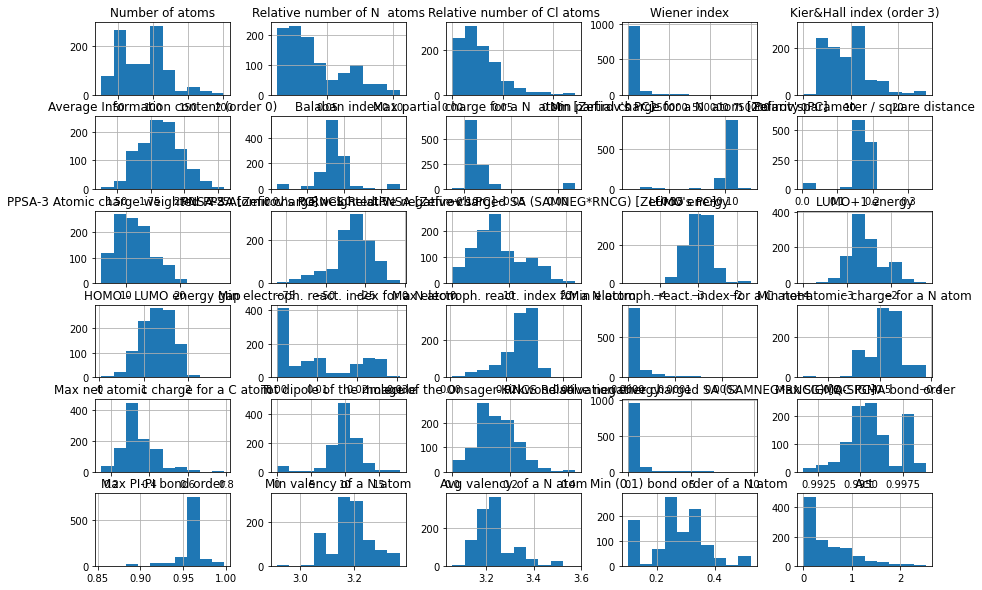

In [3]:
dataset.hist(figsize=(15, 10))

In [4]:
dataset.shape

(1056, 30)

In [5]:
x = dataset.drop(['Act'],axis=1).astype (float)
y = dataset['Act']

In [6]:
x.shape

(1056, 29)

In [7]:
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=.2, random_state = 47, shuffle=True)

In [8]:
X_test.shape

(212, 29)

In [9]:
X_train.shape

(844, 29)

In [10]:
# scealing is required for indepandent variables at SDG
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [11]:
scale = StandardScaler()

In [12]:
scale.fit(X_train)

StandardScaler()

In [13]:
x_train = scale.fit_transform(X_train)
x_test = scale.fit_transform(X_test)

In [14]:
regressor = SGDRegressor(loss = 'squared_loss', penalty = 'l2', 
                          alpha = 0.01,  l1_ratio = 0.25, tol = 0.01, learning_rate =  'adaptive',
                           eta0 = 0.1, max_iter=50000, random_state=0 ) 

In [15]:
import time
from datetime import timedelta
start_time = time.monotonic()

In [16]:
 regressor.fit (x_train, y_train)

SGDRegressor(alpha=0.01, eta0=0.1, l1_ratio=0.25, learning_rate='adaptive',
             max_iter=50000, random_state=0, tol=0.01)

In [17]:
end_time = time.monotonic()
print(timedelta(seconds=end_time - start_time))

0:00:01.594000


In [18]:
# compute the test accuracy
y_pred = regressor.predict(x_test)

In [19]:
y_pred_train = regressor.predict(x_train)

In [20]:
y_pred_train.shape

(844,)

In [21]:
  print("\n")
  print("overall Performance: ", )



overall Performance: 


In [25]:
  # model evaluation for test set
  mae = metrics.mean_absolute_error(y_test, y_pred)
  mse = metrics.mean_squared_error(y_test, y_pred)
  r2 = metrics.r2_score(y_test, y_pred)
  rmse = round(math.sqrt(mse),4)

In [26]:
print("The model performance for testing set")
print("--------------------------------------")
print('MAE is {}'.format(mae))
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))

The model performance for testing set
--------------------------------------
MAE is 0.29641816964649326
RMSE is 0.398
R2 score is 0.3934155069868509


In [27]:
  # model evaluation for training set
maeTrain = metrics.mean_absolute_error(y_train, y_pred_train)
mseTrain = metrics.mean_squared_error(y_train, y_pred_train)
r2Train = metrics.r2_score(y_train, y_pred_train)
rmseTrain = round(math.sqrt(mseTrain),4)

In [28]:
print("The model performance for training set")
print("--------------------------------------")
print('MAE is {}'.format(maeTrain))
print('RMSE is {}'.format(rmseTrain))
print('R2 score is {}'.format(r2Train))

The model performance for training set
--------------------------------------
MAE is 0.29131752523806953
RMSE is 0.3875
R2 score is 0.34992961579523507


In [29]:
cvscoretrain = (cross_val_score(regressor,x_train,y_train.ravel(),cv=5).mean())

In [30]:
print("The CV score for training set")
print("--------------------------------------")
print (cross_val_score(regressor,x_train,y_train.ravel(),cv=5))
print('Q2 is {}'.format(cvscoretrain))

The CV score for training set
--------------------------------------
[0.3286077  0.23316589 0.32615953 0.28538489 0.28891667]
Q2 is 0.2924469373884661


In [31]:
regressor.intercept_

array([0.48491584])

In [32]:
regressor.coef_

array([-0.07772396, -0.1494277 , -0.01189593,  0.03428517, -0.09075801,
       -0.03100116,  0.04525631, -0.01077332, -0.00842527, -0.02867322,
        0.00206781, -0.08103977, -0.05957143,  0.13761328, -0.21469124,
       -0.03413405,  0.10058285,  0.0607615 , -0.01672125, -0.08037327,
       -0.03271241,  0.03347804, -0.07036841,  0.01932401,  0.00374248,
       -0.03658345, -0.08201051,  0.07037602,  0.01836037])

In [ ]:
import statsmodels.api as sm

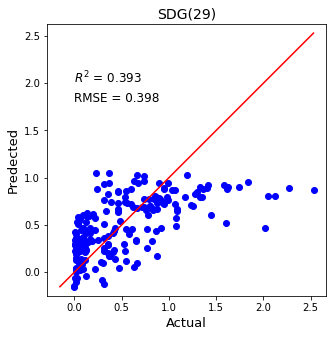

In [33]:
plt.figure(figsize=(5,5))
plt.scatter(y_test, y_pred, c='blue', marker='o')
plt.yscale('linear')
plt.xscale('linear')

p1 = max(max(y_pred), max(y_test))
p2 = min(min(y_pred), min(y_test))
plt.plot([p1, p2], [p1, p2], 'red')
plt.xlabel('Actual', fontsize=13)
plt.ylabel('Predected', fontsize=13)
plt.axis('equal')
plt.text(0, 2, '$R^2$ = 0.393', fontsize = 12)
plt.text(0, 1.8, 'RMSE = 0.398', fontsize = 12)
plt.title('SDG(29)', fontsize = 14)
plt.show()

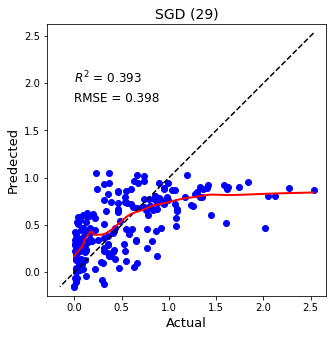

In [34]:
import matplotlib.pyplot as plt
import statsmodels.api as sm
plt.figure(figsize=(5,5))
plt.scatter(y_test, y_pred, c='blue', marker='o', linewidth=1)
plt.yscale('linear')
plt.xscale('linear')


p1 = max(max(y_pred), max(y_test))
p2 = min(min(y_pred), min(y_test))
plt.plot([p1, p2], [p1, p2], c='black', linestyle='dashed')
plt.xlabel('Actual', fontsize=13)
plt.ylabel('Predected', fontsize=13)
plt.axis('equal')
plt.text(0, 2, '$R^2$ = 0.393', fontsize = 12)
plt.text(0, 1.8, 'RMSE = 0.398', fontsize = 12)
plt.title('SGD (29)', fontsize = 14)

# Draw a Loess best-fit line over the scatter plot
lowess = sm.nonparametric.lowess
loess_fit = lowess(y_pred, y_test, frac=0.3)
# Plot the loess fit line on the scatter plot
plt.plot(loess_fit[:, 0], loess_fit[:, 1], 'r-', linewidth=2)

plt.show()

In [30]:
#Randomize search CV
from sklearn.model_selection import RandomizedSearchCV

In [31]:
# creatting parameter gride
loss = ['squared_loss', 'huber', 'epsilon_insensitive','squared_epsilon_insensitive'] 
penalty = ['l1', 'l2', 'elasticnet'] 
alpha = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100] 
l1_ratio = [0.15,0.25, 0.35,0.50, 0.80, 1.0]
tol = [1e-2, 1e-3, 1e-4]
learning_rate = ['constant', 'optimal', 'invscaling', 'adaptive'] 
eta0 = [0.01, 0.5, 1, 10, 50]

In [32]:
param_grid_regressor = dict(loss=loss, penalty=penalty, alpha=alpha, l1_ratio=l1_ratio,
                            tol=tol, learning_rate=learning_rate, eta0=eta0)

In [33]:
regressor_random = RandomizedSearchCV(estimator = regressor, param_distributions=param_grid_regressor, n_iter = 100,
                              cv = 5, verbose =2,
                              n_jobs= -1, scoring = 'neg_mean_squared_error' )

In [34]:
regressor_random.fit (x_train,y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


RandomizedSearchCV(cv=5,
                   estimator=SGDRegressor(alpha=0.001, eta0=0.03, l1_ratio=0.5,
                                          learning_rate='adaptive',
                                          max_iter=50000, penalty='l1',
                                          random_state=0, tol=0.01),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'alpha': [0.0001, 0.001, 0.01, 0.1, 1,
                                                  10, 100],
                                        'eta0': [0.01, 0.5, 1, 10, 50],
                                        'l1_ratio': [0.15, 0.25, 0.35, 0.5, 0.8,
                                                     1.0],
                                        'learning_rate': ['constant', 'optimal',
                                                          'invscaling',
                                                          'adaptive'],
                                        'loss': ['squared_loss', 'hub

In [35]:
regressor_random.best_params_

{'tol': 0.001,
 'penalty': 'l2',
 'loss': 'squared_epsilon_insensitive',
 'learning_rate': 'adaptive',
 'l1_ratio': 0.25,
 'eta0': 1,
 'alpha': 0.1}

In [36]:
regressor_random.best_score_

-0.16667390097369184

In [37]:
# parameter tuning grid searchCV
from sklearn.model_selection import GridSearchCV

In [38]:
# creatting parameter gride
loss1 = ['squared_loss', 'huber', 'epsilon_insensitive','squared_epsilon_insensitive'] 
alpha1 = [  0.01, 0.10, 0.15, 0.2] 
tol1 = [1e-1, 1e-2, 1e-3, 1e-4]
learning_rate1 = ['constant', 'optimal', 'invscaling', 'adaptive'] 
eta01 = [0.001, 0.01, 0.02, 0.03, 0.1, 0.2]

In [39]:
param_grid_regressor1 = dict(loss=loss1, penalty=penalty, alpha=alpha1, 
                            tol=tol1, learning_rate=learning_rate1, eta0=eta01)

In [40]:
regressor_grid1 = GridSearchCV(estimator =regressor, param_grid=param_grid_regressor1,
                              cv = 5, verbose =2,
                              n_jobs= -1,  scoring = "neg_mean_squared_error")

regressor_grid1.fit (x_train, y_train)

Fitting 5 folds for each of 4608 candidates, totalling 23040 fits


GridSearchCV(cv=5,
             estimator=SGDRegressor(alpha=0.001, eta0=0.03, l1_ratio=0.5,
                                    learning_rate='adaptive', max_iter=50000,
                                    penalty='l1', random_state=0, tol=0.01),
             n_jobs=-1,
             param_grid={'alpha': [0.01, 0.1, 0.15, 0.2],
                         'eta0': [0.001, 0.01, 0.02, 0.03, 0.1, 0.2],
                         'learning_rate': ['constant', 'optimal', 'invscaling',
                                           'adaptive'],
                         'loss': ['squared_loss', 'huber',
                                  'epsilon_insensitive',
                                  'squared_epsilon_insensitive'],
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'tol': [0.1, 0.01, 0.001, 0.0001]},
             scoring='neg_mean_squared_error', verbose=2)

In [41]:
regressor_grid1.best_params_

{'alpha': 0.01,
 'eta0': 0.1,
 'learning_rate': 'adaptive',
 'loss': 'squared_loss',
 'penalty': 'l2',
 'tol': 0.01}

In [42]:
regressor_grid1.best_score_

-0.1650091060246453